In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Cargar los datos
df = pd.read_csv('./framingham.csv')

In [7]:
# Remover campos con data faltante
df = df.dropna()

In [8]:
# Establecer una semilla para reproducibilidad
np.random.seed(1234)

In [9]:
# Tomar una muestra aleatoria de 500 observaciones
smp = df.sample(n=500)

In [10]:
# Convertir la columna 'male' en un factor (categórico)
smp['male'] = smp['male'].astype('category')

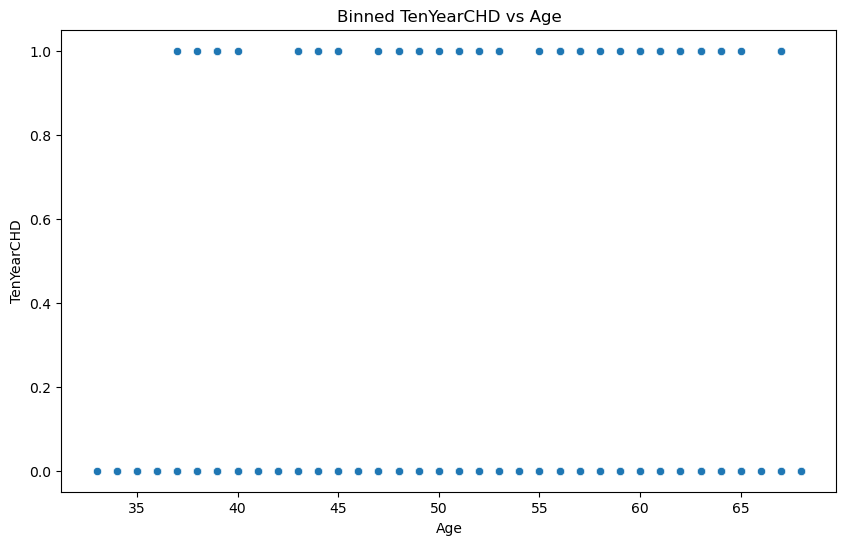

In [11]:
# Gráfico de dispersión bivariado
plt.figure(figsize=(10, 6))
sns.scatterplot(x=smp['age'], y=smp['TenYearCHD'])
plt.xlabel('Age')
plt.ylabel('TenYearCHD')
plt.title('Binned TenYearCHD vs Age')
plt.show()

In [15]:
# Preparar los datos para la regresión logística
X = smp[['age']]  # Variable independiente
y = smp['TenYearCHD']  # Variable dependiente

In [20]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Estandarizar las características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Crear un modelo de regresión logística
modelo = LogisticRegression()

In [27]:
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [31]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 90.00%


In [33]:
# Mostrar la matriz de confusión y el informe de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[90  0]
 [10  0]]


In [35]:
report = classification_report(y_test, y_pred, zero_division=1)
print('Informe de Clasificación:')
print(report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       1.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.95      0.50      0.47       100
weighted avg       0.91      0.90      0.85       100



In [37]:
# Gráfica de la curva de regresión logística
x = np.linspace(X['age'].min(), X['age'].max(), 100).reshape(-1, 1)
x_df = pd.DataFrame({'age': x[:, 0]})
x_scaled = scaler.transform(x_df)
y_prob = modelo.predict_proba(x_scaled)[:, 1]

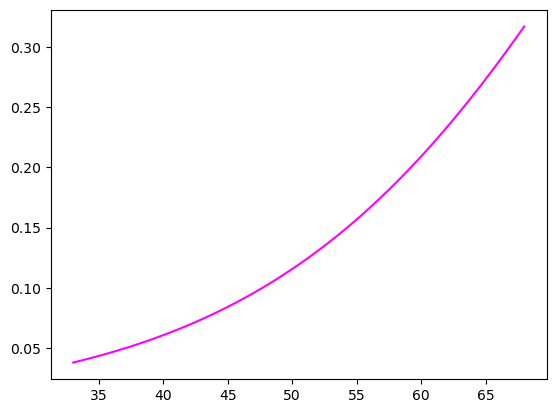

In [39]:
plt.plot(x, y_prob, color='magenta')
plt.show()